# Week07 : K-Nearest Neighbors, Multilayer Neural Network

---
p3

# 1. K-Nearest Neighbors using Scikit-learn

### Load Iris Dataset - binary classification

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# use features 2 and 3 only
X = iris.data[50:150, [2,3]]
y = iris.target[50:150]

print('Class labels:', np.unique(y))

Class labels: [1 2]


### Splitting data into 70% training data & 30% test data

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 0 50 50]
Labels counts in y_train: [ 0 35 35]
Labels counts in y_test: [ 0 15 15]


---
p4

### Standardize the dataset

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Building a K-Nearest Neighbor Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# p=2: Euclidean distance p1: Manhattan distance
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

---
p5

### Evaluation

In [9]:
# Train accuracy
acc = knn.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9429


In [10]:
# Test accuracy
acc = knn.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9667


---
p6

### Plotting decision boundary

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

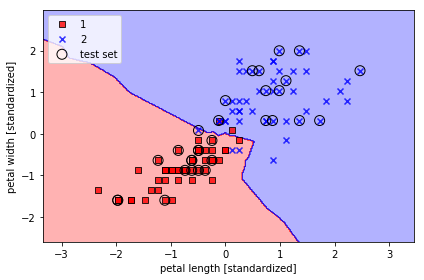

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(70, 100))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

---
p7

### Try other k values

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9,
                          p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [15]:
# Train accuracy
acc = knn.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9286


In [16]:
# Test accuracy
acc = knn.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9667


---
p8

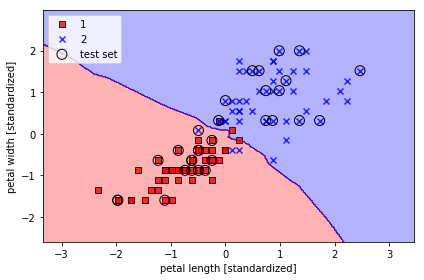

In [45]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(70, 100))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# 2. Multi-layer Neural Networks using Scikit-learn

---
p18

### Load Iris Dataset - binary classification

In [17]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[50:150, [2,3]]
y = iris.target[50:150]

print('Class labels:', np.unique(y))

Class labels: [1 2]


### Splitting data into 70% training data & 30% test data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [20]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 0 50 50]
Labels counts in y_train: [ 0 35 35]
Labels counts in y_test: [ 0 15 15]


---
p19

### Standardize the dataset

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Building a Multi-layer Neural Network and Training the model

In [23]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100, alpha=1e-4,
                   solver='sgd', verbose=1, tol=1e-4, random_state=0,
                   learning_rate_init=0.1)
mlp.fit(X_train_std, y_train)

Iteration 1, loss = 0.71016458
Iteration 2, loss = 0.59771194
Iteration 3, loss = 0.50787981
Iteration 4, loss = 0.44944913
Iteration 5, loss = 0.41261814
Iteration 6, loss = 0.38456503
Iteration 7, loss = 0.35945002
Iteration 8, loss = 0.33476426
Iteration 9, loss = 0.30923804
Iteration 10, loss = 0.28353317
Iteration 11, loss = 0.25986126
Iteration 12, loss = 0.23951732
Iteration 13, loss = 0.22314582
Iteration 14, loss = 0.21011100
Iteration 15, loss = 0.19895346
Iteration 16, loss = 0.18893915
Iteration 17, loss = 0.17992167
Iteration 18, loss = 0.17190484
Iteration 19, loss = 0.16469415
Iteration 20, loss = 0.15828186
Iteration 21, loss = 0.15253475
Iteration 22, loss = 0.14740190
Iteration 23, loss = 0.14283431
Iteration 24, loss = 0.13871857
Iteration 25, loss = 0.13510085
Iteration 26, loss = 0.13189753
Iteration 27, loss = 0.12898641
Iteration 28, loss = 0.12635281
Iteration 29, loss = 0.12394738
Iteration 30, loss = 0.12172591
Iteration 31, loss = 0.11966868
Iteration 32, los

/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

---
p20

### Loss curve

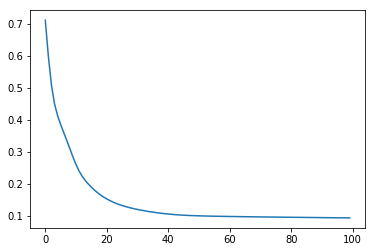

In [24]:
# plot the loss
plt.plot(mlp.loss_curve_)
plt.show()

### Evaluation

In [25]:
# Train accuracyacc = mlp.score(X_train_std, y_train)
acc = mlp.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9429


In [26]:
# Test accuracy
acc = mlp.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9667


---
p21

### Plotting decision boundary

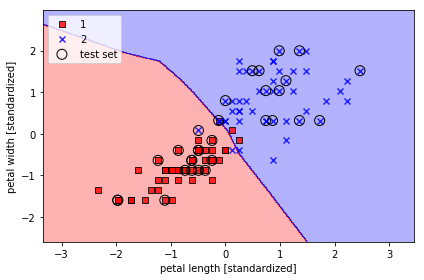

In [27]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#mlp.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=mlp, test_idx=range(70, 100))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

---
p22

### Try other regularization parameters (alpha)

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100, alpha=1,
                   solver='sgd', verbose=0, tol=1e-6, random_state=0,
                   learning_rate_init=0.1)
mlp.fit(X_train_std, y_train)

/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='sgd', tol=1e-06,
       validation_fraction=0.1, verbose=0, warm_start=False)

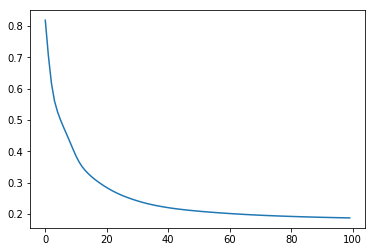

In [30]:
# plot the loss
plt.plot(mlp.loss_curve_)
plt.show()

---
p23

In [31]:
# Train accuracy
acc = mlp.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9286


In [32]:
# Test accuracy
acc = mlp.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9667


---
p24

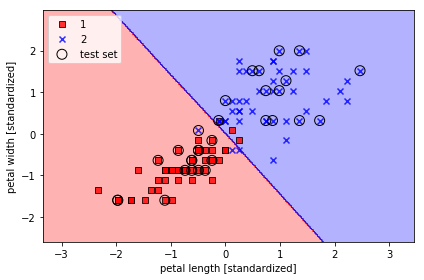

In [33]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=mlp, test_idx=range(70, 100))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

---
p27

# 3. Multi-layer Neural Networks - Image Classification

### Load MNIST Dataset

In [34]:
# from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

mnist = io.loadmat('mnist-original.mat')
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

### Get X and y

In [35]:
X, y = mnist['data'], mnist['label']
X = np.array(X).T
y = np.array(y).T.ravel()
X.shape

(70000, 784)

In [36]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [37]:
y[0]

0.0

---
p28

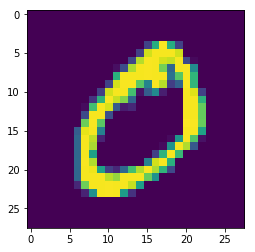

In [38]:
ex1 = X[0] 
ex1_image = ex1.reshape(28, 28) 
plt.imshow(ex1_image) 
plt.show()

### Splitting data into 60k training data & 10k test data

In [46]:
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

---
p29

### Standardize the dataset

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
X_train_std[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00441808, -0.00575482, -0.00408252,
       -0.00408252,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00408252, -0.00470969, -0.00879935,
       -0.01159056, -0.01475898, -0.01928485, -0.0246718 , -0.02907103,
       -0.03059266, -0.03116401, -0.03196287, -0.03020254, -0.03131022,
       -0.0283834 , -0.02311919, -0.01916663, -0.0167723 , -0.01099636,
       -0.00832486, -0.00438069,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00408252, -0.00539535,
       -0.00852241, -0.01198504, -0.01765348, -0.0277109 , -0.03702009,
       -0.05215128, -0.0670362 , -0.08301705, -0.0993793 , -0.11

---
p30

### Building a Multi-layer Neural Network and Training the model

In [50]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(25,25), max_iter=100, alpha=1e-4,
                   solver='sgd', verbose=10, tol=1e-4, random_state=0,
                   learning_rate_init=0.1)
mlp.fit(X_train_std, y_train)

Iteration 1, loss = 0.33721968
Iteration 2, loss = 0.21275672
Iteration 3, loss = 0.21711401
Iteration 4, loss = 0.18154456
Iteration 5, loss = 0.18691626
Iteration 6, loss = 0.24173476
Iteration 7, loss = 0.19265940
Iteration 8, loss = 0.16257663
Iteration 9, loss = 0.14850809
Iteration 10, loss = 0.14903360
Iteration 11, loss = 0.12985725
Iteration 12, loss = 0.15035108
Iteration 13, loss = 0.14200744
Iteration 14, loss = 0.12185900
Iteration 15, loss = 0.11624736
Iteration 16, loss = 0.11135552
Iteration 17, loss = 0.11587840
Iteration 18, loss = 0.12061458
Iteration 19, loss = 0.12238205
Iteration 20, loss = 0.11204124
Iteration 21, loss = 0.12883771
Iteration 22, loss = 0.22517201
Iteration 23, loss = 0.17507866
Iteration 24, loss = 0.18869458
Iteration 25, loss = 0.14901165
Iteration 26, loss = 0.12241516
Iteration 27, loss = 0.11202647
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 25), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

---
p31

### Loss curve

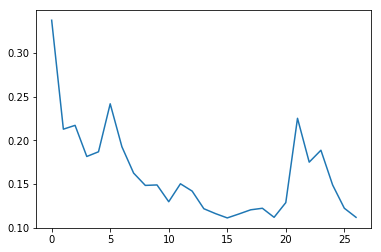

In [53]:
# plot the loss
plt.plot(mlp.loss_curve_)
plt.show()

### Evaluation

In [54]:
# Train accuracy
acc = mlp.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9638


In [55]:
# Test accuracy
acc = mlp.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9444


---
p32

### Classification example

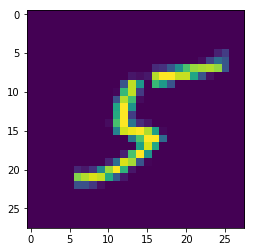

In [56]:
some_digit1 = X[35000]
some_digit_image1 = some_digit1.reshape(28, 28)
plt.imshow(some_digit_image1)
plt.show()

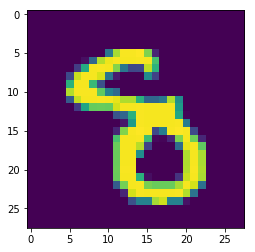

In [57]:
some_digit2 = X[50000]
some_digit_image2 = some_digit2.reshape(28, 28)
plt.imshow(some_digit_image2)
plt.show()

In [59]:
# classification
mlp.predict(sc.transform([some_digit1]))

array([5.])

In [60]:
# classification
mlp.predict(sc.transform([some_digit2]))

array([8.])

---
p33

### Visualization of MLP weights on MNIST

In [61]:
mlp.coefs_[0].shape

(784, 25)

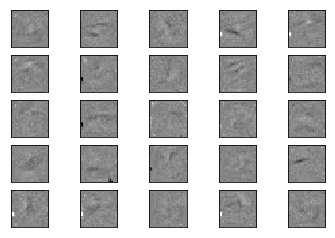

In [62]:
fig, axes = plt.subplots(5, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

---
p34

In [63]:
mlp.coefs_[1].shape

(25, 25)

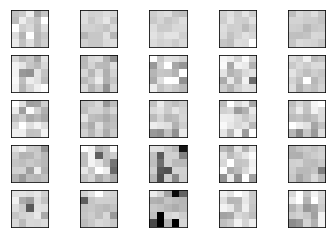

In [64]:
fig, axes = plt.subplots(5, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()
for coef, ax in zip(mlp.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(5, 5), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

---
p35

In [65]:
mlp.coefs_[2].shape

(25, 10)

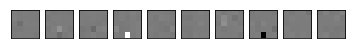

In [66]:
fig, axes = plt.subplots(1, 10)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[2].min(), mlp.coefs_[2].max()
for coef, ax in zip(mlp.coefs_[2].T, axes.ravel()):
    ax.matshow(coef.reshape(5, 5), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

---
p36

# Submit
- To make sure if you have completed this practice, Submit your practice file(Week07_givencode.ipynb) to e-class.
- **Deadline : tomorrow 11:59pm**
- Modify your ipynb file name as **“Week07_StudentNum_Name.ipynb”**
  - ```Ex) Week07_2020123456_홍길동.ipynb``` 
- You can upload this file without taking the quiz, but **homework is provided like a quiz every three weeks**, so it is recommended to take the quiz as well.

# Quiz 1
- Dataset : Iris dataset(use all features)
- Model : K-Nearest Neighbors
- Find the hyperparameter that makes highest test accuracy(0.9556) 
   - Number of Neighbors : 3, 5, 7, ...
   - distance metric : manhattan(p=1) / euclidean(p=2)

### Load Iris Dataset

In [70]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Splitting data into 70% training data & 30% test data

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [72]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


### Standardize the dataset

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Building a K-Nearest Neighbor Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,
                          p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Evaluation

In [75]:
# Train accuracy
acc = knn.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9524


In [76]:
# Test accuracy
acc = knn.score(X_test_std, y_test)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9556


# Quiz 2
- Dataset : MNIST dataset
- Model : Multi-layer Neural Network
- Find the hyperparameter that makes highest test accuracy 
   - Number of hidden layers
   - Regularization ratio


### Load MNIST Dataset

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

mnist = io.loadmat('mnist-original.mat')

In [79]:
X, y = mnist['data'], mnist['label']
X = np.array(X).T
y = np.array(y).T.ravel()

In [80]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [81]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Try different structures
- Change the number of layers from 2 to 1 : **hidden_layer_sizes**=(25,)
- Compare with the above result(when the number of layer is 2)
  - train accuracy
  - test accuracy

In [83]:
# hidden_layer_size : (25, ) : 1 hidden layer with 25 units 
mlp = MLPClassifier(hidden_layer_sizes=(25,), max_iter=100, alpha=1e-4,
                   solver='sgd', verbose=10, tol=1e-4, random_state=0,
                   learning_rate_init=0.1)
mlp.fit(X_train_std, y_train)

Iteration 1, loss = 0.32229563
Iteration 2, loss = 0.24839768
Iteration 3, loss = 0.21068648
Iteration 4, loss = 0.20958527
Iteration 5, loss = 0.23747714
Iteration 6, loss = 0.22420363
Iteration 7, loss = 0.22165903
Iteration 8, loss = 0.18779313
Iteration 9, loss = 0.16198852
Iteration 10, loss = 0.14831431
Iteration 11, loss = 0.18393061
Iteration 12, loss = 0.16403634
Iteration 13, loss = 0.13531296
Iteration 14, loss = 0.13013136
Iteration 15, loss = 0.18851083
Iteration 16, loss = 0.18301172
Iteration 17, loss = 0.34312078
Iteration 18, loss = 0.20637684
Iteration 19, loss = 0.17396121
Iteration 20, loss = 0.13698796
Iteration 21, loss = 0.16258746
Iteration 22, loss = 0.12890049
Iteration 23, loss = 0.11680150
Iteration 24, loss = 0.11265391
Iteration 25, loss = 0.10394555
Iteration 26, loss = 0.08681046
Iteration 27, loss = 0.09769373
Iteration 28, loss = 0.10042444
Iteration 29, loss = 0.13090740
Iteration 30, loss = 0.12230091
Iteration 31, loss = 0.10368472
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [395]:
None

Iteration 1, loss = 0.45899938
Iteration 2, loss = 0.21946250
Iteration 3, loss = 0.18124313
Iteration 4, loss = 0.15950472
Iteration 5, loss = 0.14405402
Iteration 6, loss = 0.13261368
Iteration 7, loss = 0.12323579
Iteration 8, loss = 0.11529821
Iteration 9, loss = 0.10854910
Iteration 10, loss = 0.10273808
Iteration 11, loss = 0.09723214
Iteration 12, loss = 0.09285393
Iteration 13, loss = 0.08866769
Iteration 14, loss = 0.08515705
Iteration 15, loss = 0.08153971
Iteration 16, loss = 0.07837853
Iteration 17, loss = 0.07532810
Iteration 18, loss = 0.07297431
Iteration 19, loss = 0.07020102
Iteration 20, loss = 0.06820202
Iteration 21, loss = 0.06586696
Iteration 22, loss = 0.06405118
Iteration 23, loss = 0.06114188
Iteration 24, loss = 0.05974286
Iteration 25, loss = 0.05768151
Iteration 26, loss = 0.05622954
Iteration 27, loss = 0.05510486
Iteration 28, loss = 0.05325111
Iteration 29, loss = 0.05139568
Iteration 30, loss = 0.05018706
Iteration 31, loss = 0.04897507
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

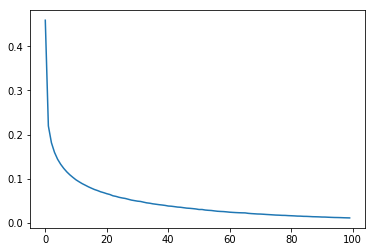

In [396]:
# plot the loss
None
plt.show()

### Evaluation 
- Train accuracy is lower than the above one.
- Test accuracy is higher than the above one.

In [85]:
mlp.score(X_train_std, y_train) # previous train acc with (25, 25), alpha=1e-4 : 1.0000
# # Train accuracy
# acc = mlp.score(X_train_std, y_train)
# print("Train accuracy : %.4f" % acc)

0.98115

In [86]:
mlp.score(X_test_std, y_test) # previous test acc with (25, 25), alpha=1e-4 : 0.9557

0.9472

### Try different regularization ratio
- Change the regularization term ratio : **alpha**=1  
  The larger the alpha value, the stronger the regularization is applied.
- compare with the above result(when alpha = 1e-4)
  - train accuracy
  - test accuracy

In [90]:
# L2 regularization ratio : alpha 
mlp2 = MLPClassifier(hidden_layer_sizes=(25,), max_iter=100, alpha=1,
                    solver='sgd', verbose=10, tol=1e-4, random_state=0,
                    learning_rate_init=0.1)
# mlp = MLPClassifier(hidden_layer_sizes=(25,), max_iter=100, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=0,
#                    learning_rate_init=0.1)
# mlp.fit(X_train_std, y_train)

In [91]:
mlp2.fit(X_train_std, y_train)

Iteration 1, loss = 0.49684000
Iteration 2, loss = 0.35856427
Iteration 3, loss = 0.33722199
Iteration 4, loss = 0.34089192
Iteration 5, loss = 0.35755645
Iteration 6, loss = 0.35309006
Iteration 7, loss = 0.34621990
Iteration 8, loss = 0.34405381
Iteration 9, loss = 0.33575415
Iteration 10, loss = 0.34751531
Iteration 11, loss = 0.34164250
Iteration 12, loss = 0.34062318
Iteration 13, loss = 0.35208646
Iteration 14, loss = 0.33939929
Iteration 15, loss = 0.33655577
Iteration 16, loss = 0.33143380
Iteration 17, loss = 0.34048478
Iteration 18, loss = 0.32743865
Iteration 19, loss = 0.34710605
Iteration 20, loss = 0.33998282
Iteration 21, loss = 0.33737138
Iteration 22, loss = 0.34161436
Iteration 23, loss = 0.34202670
Iteration 24, loss = 0.34199936
Iteration 25, loss = 0.34837265
Iteration 26, loss = 0.32869852
Iteration 27, loss = 0.34864137
Iteration 28, loss = 0.34122084
Iteration 29, loss = 0.33101714
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

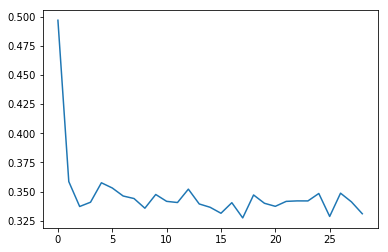

In [92]:
plt.plot(mlp2.loss_curve_)
plt.show()

### Evaluation 
- Train accuracy is lower than the above one.
- Test accuracy is higher than the above one.

In [402]:
mlp2.score(None) # previous train acc with (25, 25), alpha=1e-4 : 1.0000

0.97761666666666669

In [403]:
mlp2.score(None) # previous test acc with (25, 25), alpha=1e-4 : 0.9557

0.96679999999999999